In [1]:
import matplotlib.pylab as plt 
from scipy import interp 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve,auc 
from sklearn.model_selection import StratifiedKFold 
import matplotlib.patches as patches 
import numpy as np 
import pandas as pd 


In [2]:
data = pd .read_csv('data.csv') 
print(data.columns) 
label_value_count = data.label.value_counts() 
print(label_value_count) 
print(data.info()) 

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')
female    1584
male      1584
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun  

In [3]:
dict = {'label':{'male':1,'female':0}} 
data.replace(dict,inplace = True) 
x = data.loc[:, data.columns != 'label'] 
y = data.loc[:,'label'] 

In [4]:
random_state = np.random.RandomState(0) 
clf = RandomForestClassifier(random_state=random_state) 
cv = StratifiedKFold(n_splits=5,shuffle=False) 


<ipython-input-7-167c767a89d3>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-7-167c767a89d3>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-7-167c767a89d3>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-7-167c767a89d3>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-7-167c767a89d3>:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


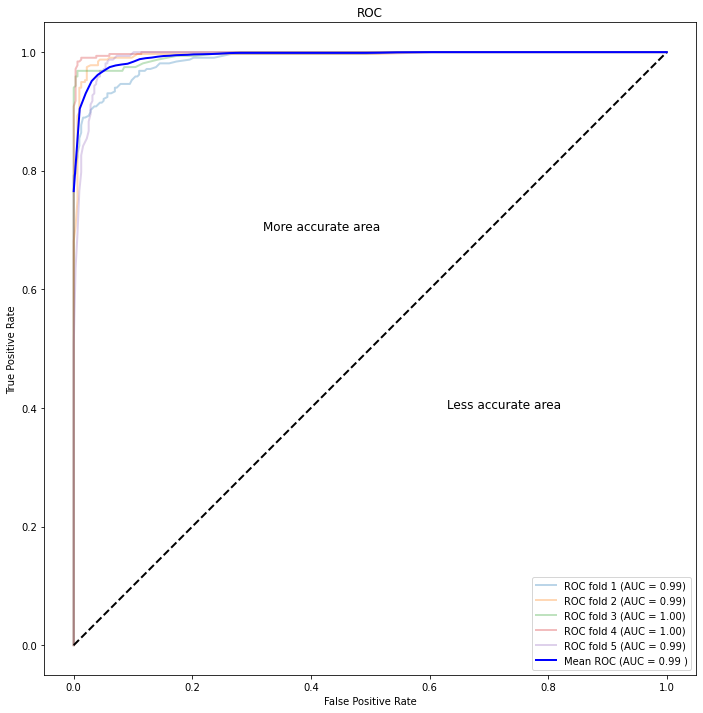

In [7]:
fig1 = plt.figure(figsize=[12,12]) 
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = [] 
aucs = [] 
mean_fpr = np.linspace(0,1,100) 
i = 1 
for train,test in cv.split(x,y): 
 prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test]) 
 fpr, tpr, t = roc_curve(y[test], prediction[:, 1]) 
 tprs.append(interp(mean_fpr, fpr, tpr)) 
 roc_auc = auc(fpr, tpr) 
 aucs.append(roc_auc) 
 plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc)) 
 i= i+1 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black') 
mean_tpr = np.mean(tprs, axis=0) 
mean_auc = auc(mean_fpr, mean_tpr) 
plt.plot(mean_fpr, mean_tpr, color='blue', 
label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC') 
plt.legend(loc="lower right") 
plt.text(0.32,0.7,'More accurate area',fontsize = 12) 
plt.text(0.63,0.4,'Less accurate area',fontsize = 12) 
plt.show()